# Bike Sharing: Multiple Linear Regression Assignment

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short-term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes?
How well do those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Data understanding, preparation and EDA

## Data understanding

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
#Reading data using Pandas
df = pd.read_csv('day.csv')

In [4]:
#Checking first five rows of dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#check the shape of data
df.shape

(730, 16)

In [6]:
#checking info about the data if there is any null value and checking their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Cheking numerical details of the data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### From this description we can see that there are no outlyers present

In [8]:
#check if any duplicate row is present

duplicate_rows = df[df.duplicated(keep=False)]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


As we can see that after performing the initial steps we found:
    - There are 730 rows and 16 columns
    - There are no null values in the data
    - There are no duplicate values in the data

## Data Cleaning

### As we can see that Instant is the index Value, dteday will not be required for analysis because the analysis will not be datewise 
### and since cnt already has a total number of booked bikes so casual and registered columns will not be required 

In [9]:
#dropping unwanted columns
df.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### In the document (Readme.txt) it was not mentioned about the first day of week so I am taking refrence from https://museum.seiko.co.jp/en/knowledge/trivia07/#:~:text=In%20fact%2C%20in%201971%2C%20rules,by%20numbers%2C%201%20to%207. and starting to count from monday 

In [11]:
# Define categorical mappings
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weathersit_mapping = {1: 'Clear/Few Clouds',2: 'Mist/Cloudy',3: 'Light Snow/Rain',4: 'Heavy Rain/Snow'}
weekday_mapping = {0: 'mon', 1: 'tue', 2: 'wed', 3: 'thu', 4: 'fri', 5: 'sat', 6: 'sun'}

# Apply mappings to categorical columns
df['season'] = df['season'].map(season_mapping).astype('category')
df['yr'] = df['yr'].astype('category')
df['weathersit'] = df['weathersit'].map(weathersit_mapping).astype('category')
df['weekday'] = df['weekday'].map(weekday_mapping).astype('category')

# Convert 'mnth', 'holiday', 'weekday', 'workingday' to categorical data types
categorical_columns = ['mnth', 'holiday', 'weekday', 'workingday']
df[categorical_columns] = df[categorical_columns].astype('category')

In [12]:
#Checking first five rows of dataset
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,tue,1,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,wed,1,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,thu,1,Clear/Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,fri,1,Clear/Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,sat,1,Clear/Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#check data types of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


#### Since there are no missing values and all the data is in required format so we can proceed to data Visulization

## Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

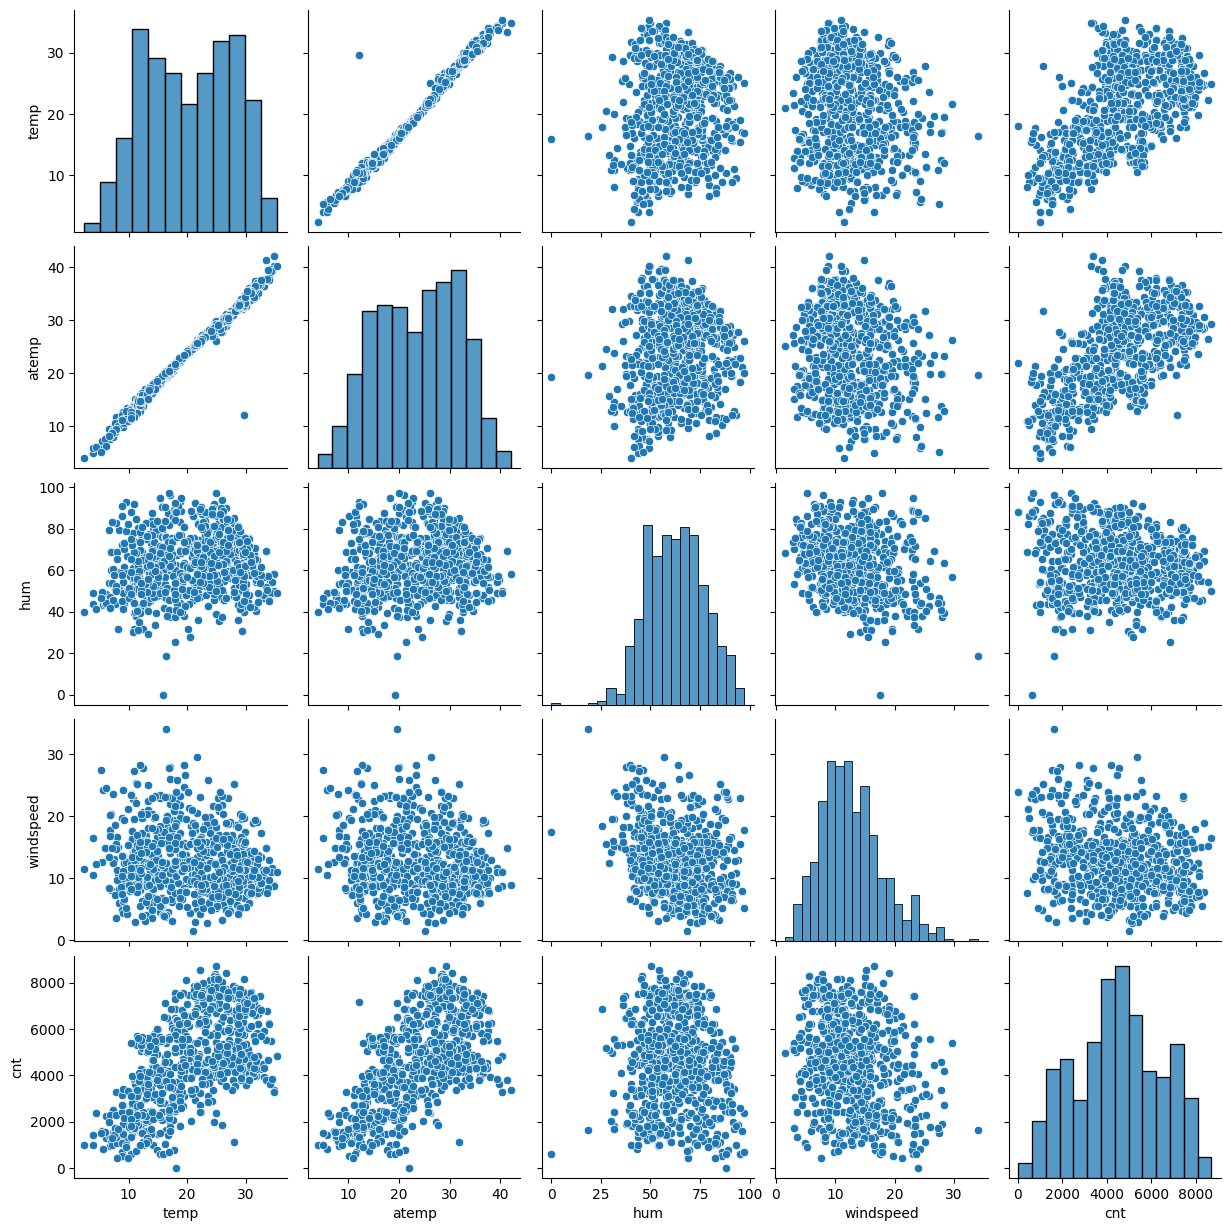

In [14]:
#Let's visulise numerical data
sns.pairplot(df)
plt.show()

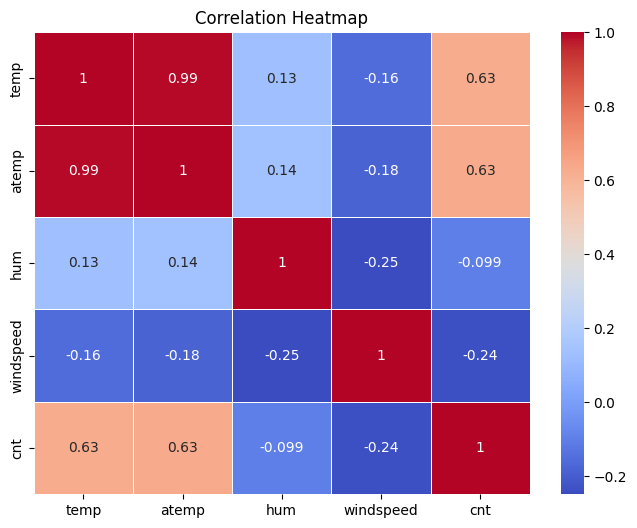

In [15]:
# Let's check the correlation coefficients to see which variables are highly correlated

# Select the columns for the heatmap
columns_for_heatmap = ['temp','atemp', 'hum', 'windspeed', 'cnt']

# Calculate the correlation matrix
correlation_matrix = df[columns_for_heatmap].corr()

# Set up the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## As we can see that temp, atemp and cnt has high corelationship. 
    -but we will focus on `temp` and `atemp`  
    -according to the values of pvalue and VIF we will select the column 

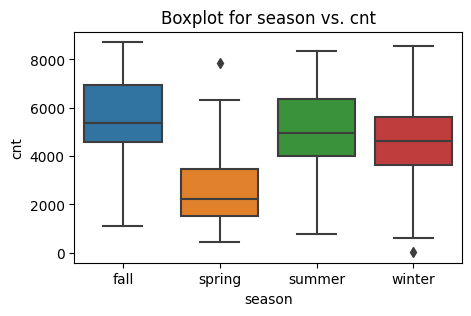

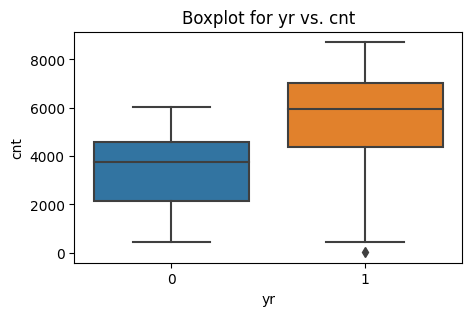

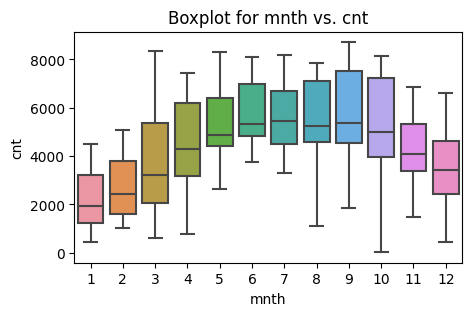

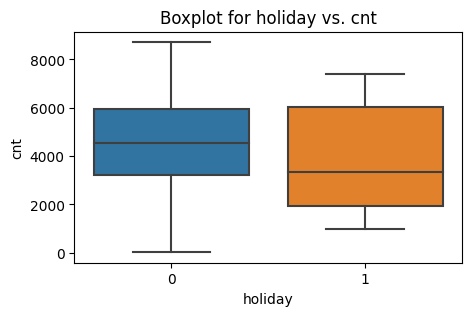

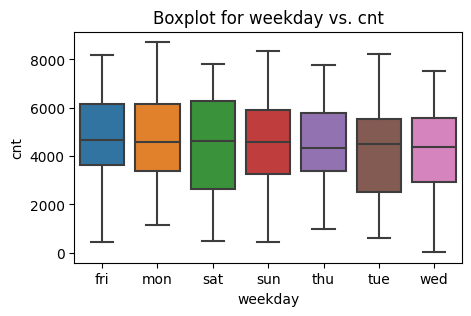

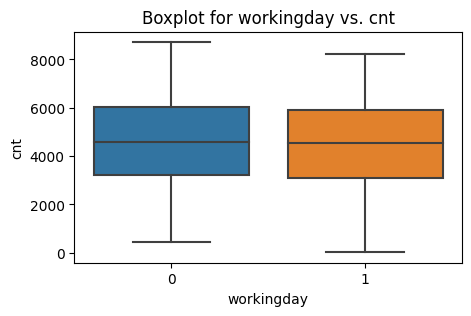

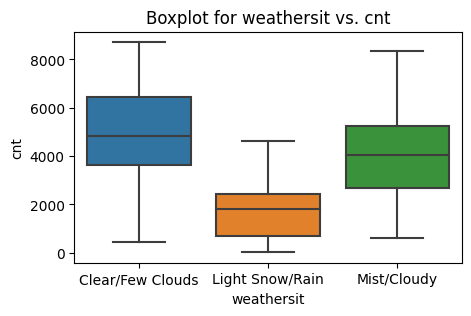

In [16]:
# List of categorical columns
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Create boxplots for each categorical column with 'cnt' as the target
for column in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=column, y='cnt', data=df)
    plt.title(f'Boxplot for {column} vs. cnt')
    plt.xlabel(column)
    plt.ylabel('cnt')
    plt.show()

## Bivariate Analysis
There is significant change in numbers of bookings so we will perform bivariate analysis for both years

## Findings about categorical data
    - Most of the bookings are done in fall season 
    - There is sharp increase in number of bookings in 2019 as compared to 2018
    - In the month of May, June, July, August, September and October there were most number of bookings
    - During non-holiday we have more number of bookings
    - There is not much difference in bookings for working and non working days so we will check with VIF and pvalues later
    - Clear weather condition results in most number of bookings
    - Apart from workingday column all the variables seems to be good predictor of dependent variables we will select variables according to their p-vales and VIF values

## Data prepration

### Dummy Variables
    - season, mnth, weekday and weathersit has 4,12,7 and 4 values respectively for which we will use dummy variables

In [17]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [18]:
#let's create new variable status and store the dummy vriables there

status = pd.get_dummies(df[['season', 'mnth', 'weekday', 'weathersit']])

In [19]:
status.head()

,season_fall,season_spring,season_summer,season_winter,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear/Few Clouds,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
0,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,False,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,False,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [20]:
#check unique values in `weathersit`
df['weathersit'].value_counts()


weathersit
Clear/Few Clouds    463
Mist/Cloudy         246
Light Snow/Rain      21
Name: count, dtype: int64

### As we can see that in dataset there is value count for Heavy Rain so we will use these 3 variables only for weathersit and we will drop first columns for all these dummy variables too since (n-1) can explain the variables

## Creating dummy variables

In [21]:
# Get the dummy variables for the features and store it in a new variable - 'status'

status = pd.get_dummies(df[['season', 'mnth', 'weekday', 'weathersit']], drop_first=True)


In [22]:
#Check few first rows of status
status.head()

,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [23]:
# Add the results to the original dataframe

df = pd.concat([df, status], axis = 1)

In [24]:
# List of columns to convert from boolean to integer
boolean_columns = [
    'season_spring', 'season_summer', 'season_winter',
    'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
    'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
    'weathersit_Light Snow/Rain', 'weathersit_Mist/Cloudy'
]

# Convert the boolean columns to integers
df[boolean_columns] = df[boolean_columns].astype(int)

In [25]:
#Check few first rows of dataframe
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
0,spring,0,1,0,tue,1,Mist/Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,0,0,1
1,spring,0,1,0,wed,1,Mist/Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,1,0,1
2,spring,0,1,0,thu,1,Clear/Few Clouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,0,0,0
3,spring,0,1,0,fri,1,Clear/Few Clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,sat,1,Clear/Few Clouds,9.305237,11.46350,43.6957,...,0,0,0,1,0,0,0,0,0,0


In [26]:
#let's drop `season`, 'weekday`, `weathersit` and `mnth` from our dataset since we have already created dummy variable for these columns
df.drop(['season','weekday','weathersit','mnth'], axis = 1, inplace = True)

In [27]:
#Check few first rows of dataframe
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
#check shape of data
df.shape

(730, 30)

In [29]:
#Check few first rows of dataframe
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
#check unique value count in each column
df.nunique()

yr                              2
holiday                         2
workingday                      2
temp                          498
atemp                         689
hum                           594
windspeed                     649
cnt                           695
season_spring                   2
season_summer                   2
season_winter                   2
mnth_2                          2
mnth_3                          2
mnth_4                          2
mnth_5                          2
mnth_6                          2
mnth_7                          2
mnth_8                          2
mnth_9                          2
mnth_10                         2
mnth_11                         2
mnth_12                         2
weekday_mon                     2
weekday_sat                     2
weekday_sun                     2
weekday_thu                     2
weekday_tue                     2
weekday_wed                     2
weathersit_Light Snow/Rain      2
weathersit_Mis

## Step 4: Splitting the Data into Training and Testing Sets

In [31]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
#Check train and test data's size erespectively
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [33]:
#checking first few rows of train data
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,1,0,0,0,0,0,0,1


In [34]:
#checking first few rows of test data
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,1,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,1,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,1,0,0,0,0,0


## Rescaling the features

We will use minmax scaling here

In [35]:
scaler = MinMaxScaler()
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
#checking first few rows of df_train data
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1


In [37]:
#check numerical data for df_train's numerical  data
df_train.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_2,mnth_3,...,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.066667,0.098039,...,0.086275,0.084314,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.029412,0.343137
std,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.249689,0.297660,...,0.281045,0.278131,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


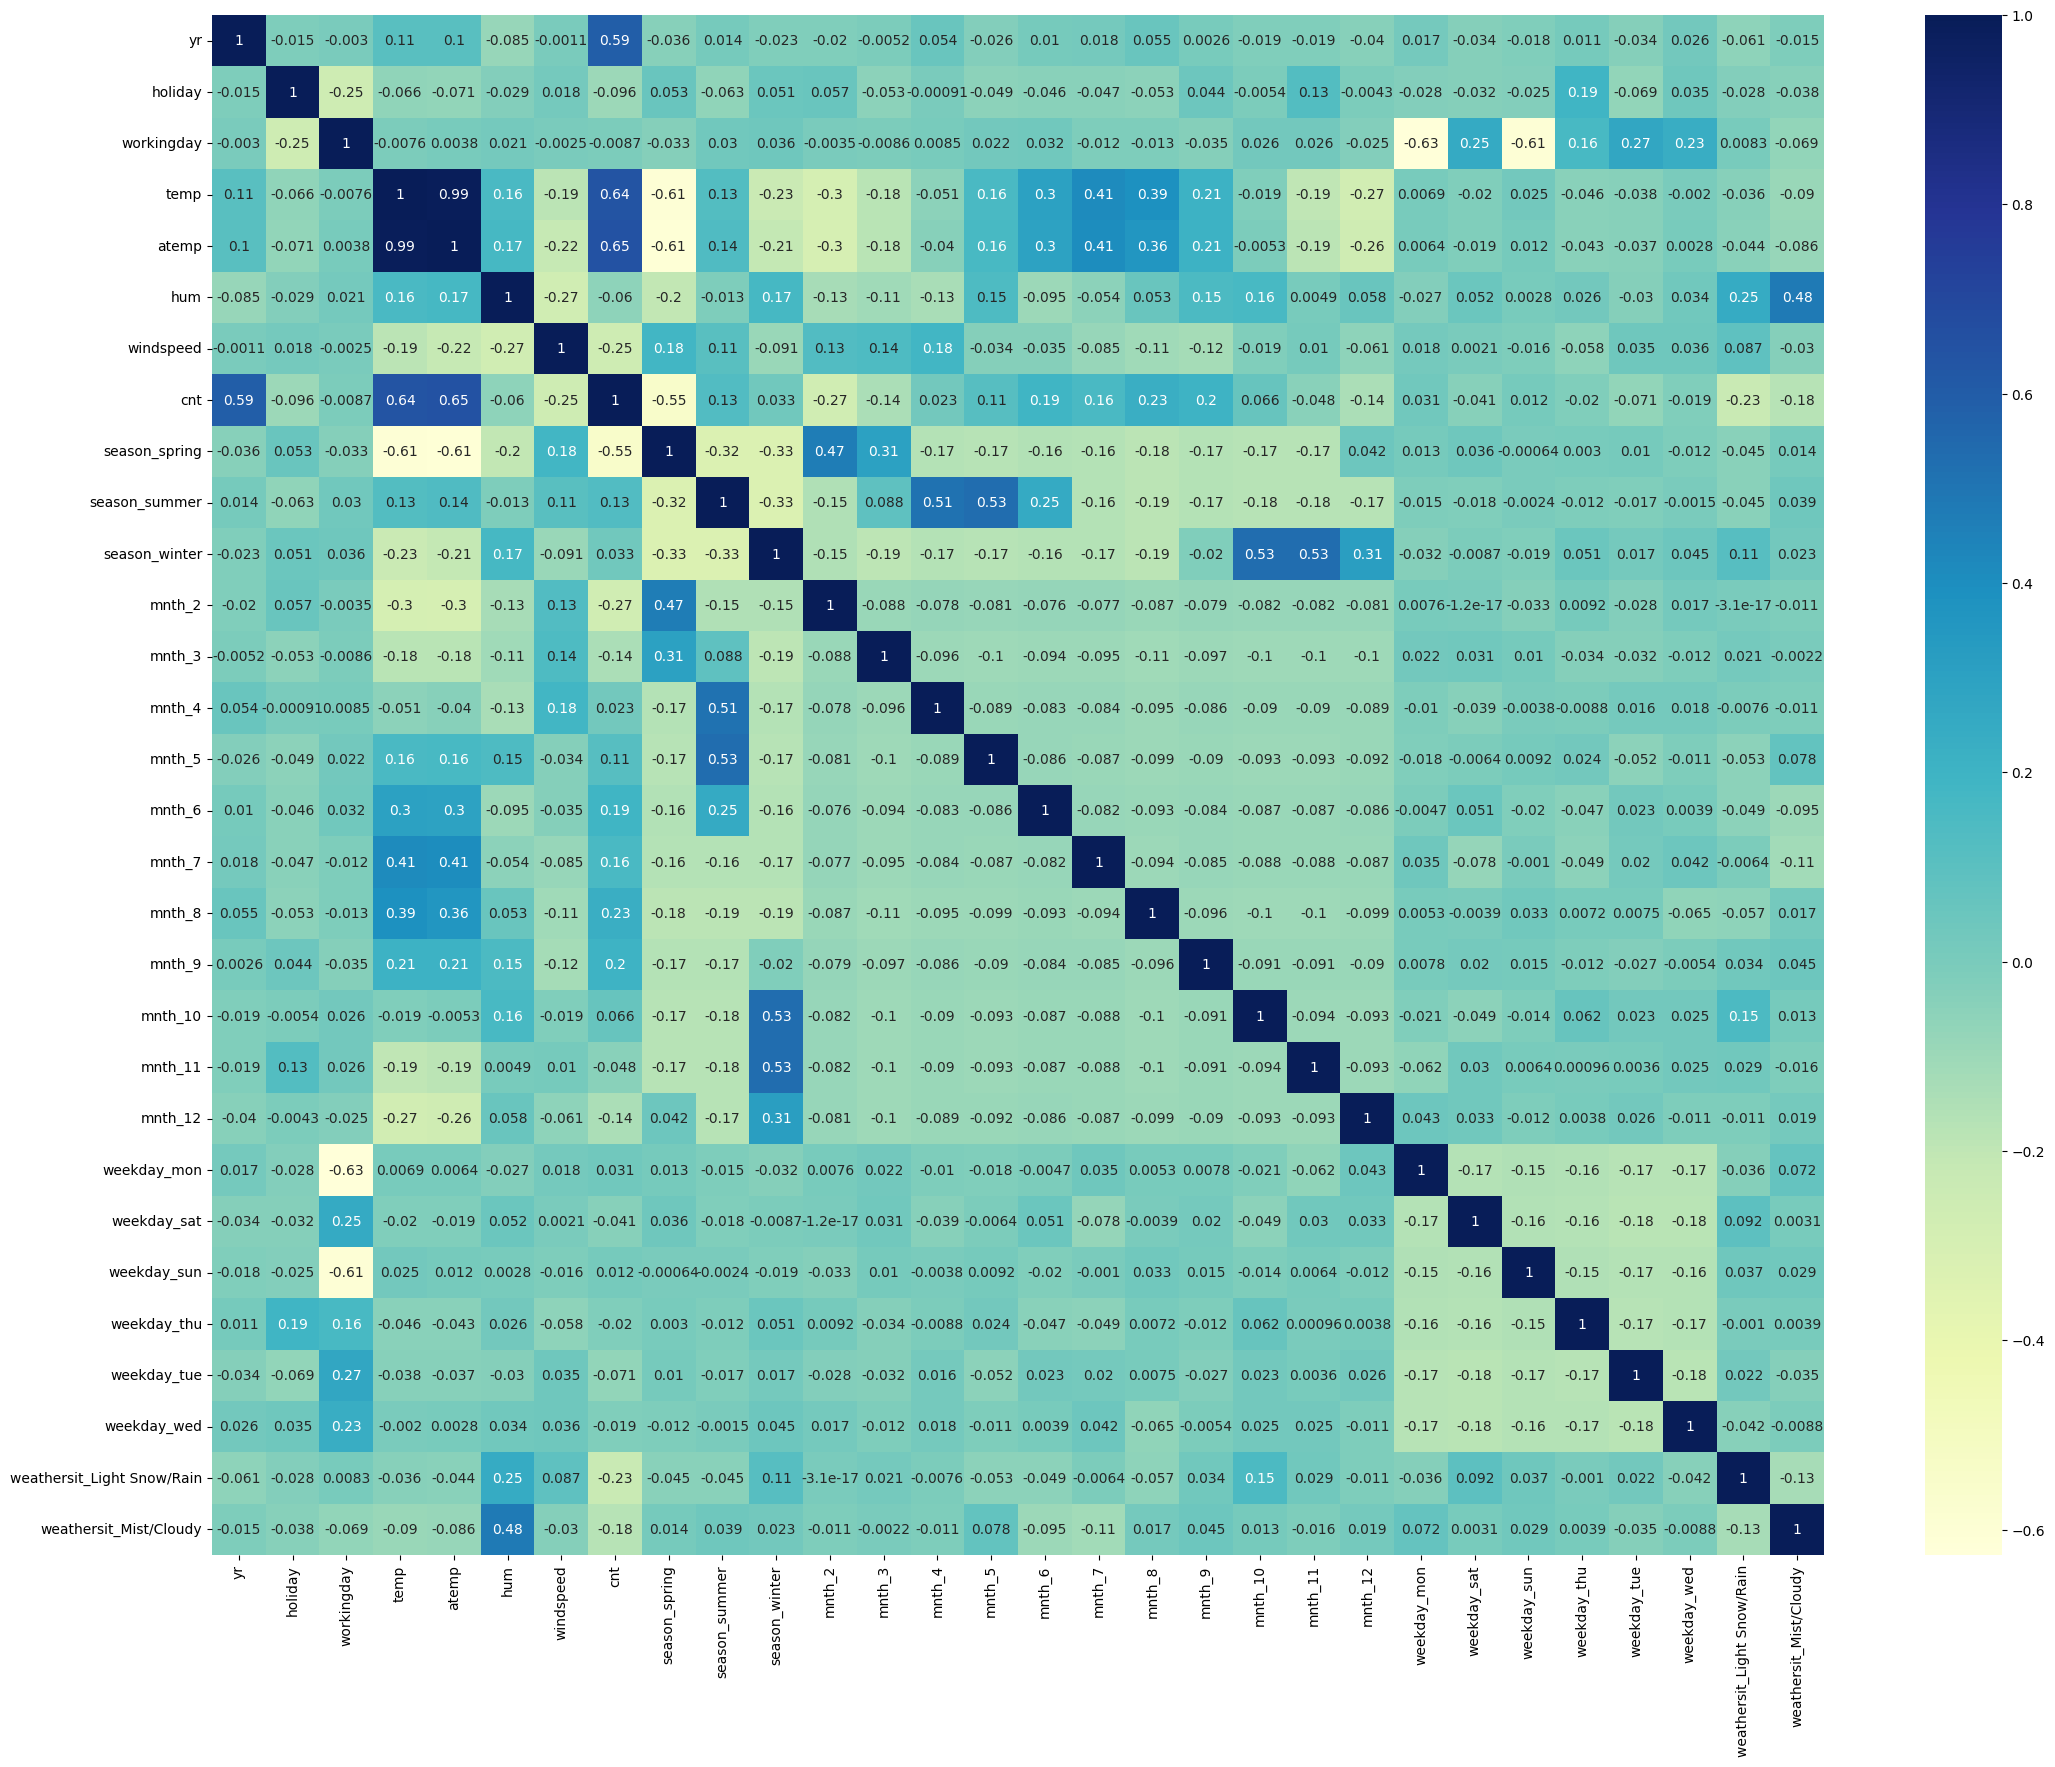

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### as we can see cnt is highly corelated with atemp 

### Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
#check few rows of y_train
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [41]:
#check few rows of X_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_11,mnth_12,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


## Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [42]:
# Create a LinearRegression model
lm = LinearRegression()

# Using only 15 variables with automated approach
# Initialize RFE with the estimator and the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE on your data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [43]:
#Variables chosen by RFE with rank

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 11),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_mon', False, 7),
 ('weekday_sat', False, 15),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 8),
 ('weathersit_Light Snow/Rain', True, 1),
 ('weathersit_Mist/Cloudy', True, 1)]

In [44]:
#saving selected columns in col variable
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_3', 'mnth_5', 'mnth_8',
       'mnth_9', 'mnth_10', 'weathersit_Light Snow/Rain',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [45]:
#checking rejected columns
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [48]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [49]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Tue, 05 Sep 2023   Prob (F-statistic):          2.95e-189
Time:                        00:31:25   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

`mnth_5` is insignificant in presence of other variables; can be dropped

In [50]:
X_train_rfe_1 = X_train_rfe.drop(["mnth_5"], axis = 1)

Rebuilding model without `mnth_5`

In [51]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_1 = sm.add_constant(X_train_rfe_1)

In [52]:
lm_1 = sm.OLS(y_train,X_train_lm_1).fit()   # Running the linear model

In [53]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 05 Sep 2023   Prob (F-statistic):          9.02e-190
Time:                        00:31:25   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

`season_spring` is insignificant in presence of other variables; can be dropped

In [54]:
X_train_rfe_2 = X_train_rfe_1.drop(["season_spring"], axis = 1)

Rebuilding model without `season_spring`

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_2 = sm.add_constant(X_train_rfe_2)

In [56]:
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()   # Running the linear model

In [57]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 05 Sep 2023   Prob (F-statistic):          2.26e-190
Time:                        00:31:25   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

`mnth_3` is insignificant in presence of other variables; can be dropped

In [58]:
X_train_rfe_3 = X_train_rfe_2.drop(["mnth_3"], axis = 1)

Rebuilding model without `mnth_5`

In [59]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_3 = sm.add_constant(X_train_rfe_3)

In [60]:
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()   # Running the linear model

In [61]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Tue, 05 Sep 2023   Prob (F-statistic):          6.02e-191
Time:                        00:31:25   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
6,season_winter,2.27
11,weathersit_Mist/Cloudy,2.13
0,yr,2.02
5,season_summer,1.83
9,mnth_10,1.61
7,mnth_8,1.60
8,mnth_9,1.34


`hum` has very high VIF so we should drop it

In [63]:
X_train_rfe_4 = X_train_rfe_3.drop(["hum"], axis = 1)

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_4 = sm.add_constant(X_train_rfe_4)

In [65]:
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()   # Running the linear model

In [66]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Tue, 05 Sep 2023   Prob (F-statistic):          3.21e-187
Time:                        00:31:25   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

`mnth_10` is insignificant in presence of other variables; can be dropped

In [67]:
X_train_rfe_5 = X_train_rfe_4.drop(["mnth_10"], axis = 1)

In [68]:
X_train_lm_5 = sm.add_constant(X_train_rfe_5)

In [69]:
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()   # Running the linear model

In [70]:
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Tue, 05 Sep 2023   Prob (F-statistic):          1.26e-187
Time:                        00:31:25   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [88]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_summer,1.81
6,mnth_8,1.58
5,season_winter,1.49
9,weathersit_Mist/Cloudy,1.48
7,mnth_9,1.31
8,weathersit_Light Snow/Rain,1.08
1,holiday,1.04


`temp` has very high VIF so we should drop it

In [72]:
X_train_rfe_6 = X_train_rfe_5.drop(["temp"], axis = 1)

In [73]:
# Adding a constant variable 
X_train_lm_6 = sm.add_constant(X_train_rfe_6)

In [74]:
lm_6 = sm.OLS(y_train,X_train_lm_6).fit()   # Running the linear model

In [75]:
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 05 Sep 2023   Prob (F-statistic):          5.01e-108
Time:                        00:31:25   Log-Likelihood:                 306.23
No. Observations:                 510   AIC:                            -592.5
Df Residuals:                     500   BIC:                            -550.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

As we can see the adjusted r squre has decreased drastically so we will not drop temp variable in final model and we will use lm_5,X_train_rfe_5 and X_train_lm_5

### We can say that model is significant because VIF and p values are under required numbers

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [76]:
y_train_pred = lm_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

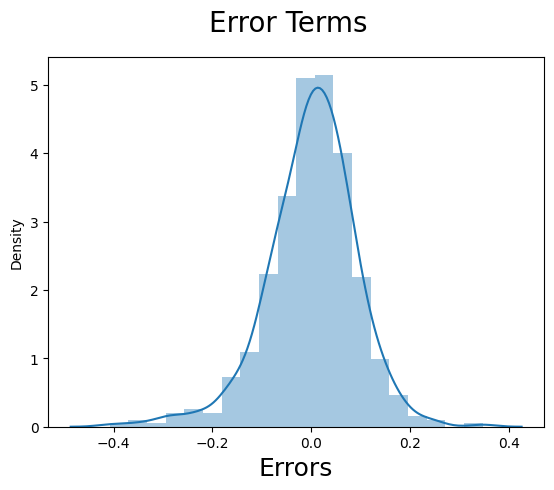

In [77]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### As we can see errors are normally distributed so we can proceed forward

## Making Predictions

#### Applying the scaling on the test sets

In [78]:


df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [79]:
y_test = df_test.pop('cnt')
X_test = df_test

In [80]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe_5.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [81]:
# Making predictions
y_pred = lm_5.predict(X_test_new)

Text(0, 0.5, 'y_pred')

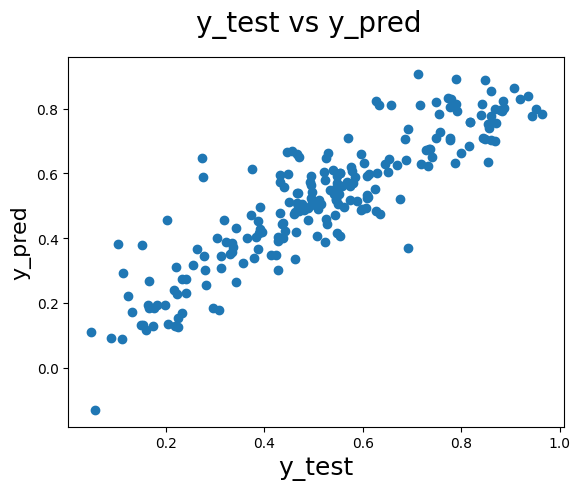

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [83]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.7931434526028904

In [86]:
# Finding Adjusted R-squared

adjusted_r2 = 1-(1-r2)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1)
adjusted_r2

0.7821510756880682

### Our best fitted equation will be: 0.1312 + 0.2345 x const - 0.0971 x holiday + 0.5174 x temp - 0.1497 x windspeed + 0.1000 x season_summer + 0.1383 x season_winter + 0.0542 x mnth_8 + 0.1162 x mnth_9 - 0.2828 x weathersit_Light Snow/Rain - 0.0825 x weathersit_Mist/Cloudy

### As we can see that there is not much difference between r^2 and adjusted r^2 of train and test model so we can say we have appropriate model for predictions